In [4]:
from sympy import *
from sympy.plotting import plot
init_printing()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)

# Compute False Match Probability

Give a grid cell representation (one cell active per module), calculate the probability that a random other representation will have at least theta overlap (false match).

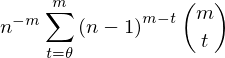

In [5]:
# n = number of cells per module
# m = number of modules
# theta = number of matching modules needed to call two representations equal
# t = exact match threshold used as an intermediate variable
# U = number of representations in union
# s = number of subsampled bits, or the number of synapses that a segment receives from a subset of the active bits
# omega = threshold for subsampling cells that results in overall match
# o = intermediate variable for omega that represents exact number of subsampling cells that match
# phi = total number of subsampling cells
n, m, theta, t, U, E, s, omega, o, phi = symbols('n, m, theta, t, U, E, s, omega, o, phi')

collision = Sum(binomial(m, t)*((n-1) ** (m-t)), (t, theta, m)) / (n ** m)
collision


# Plot False Match Probabilities

In [6]:
x=range(5, 30)
plots = [
    Scatter(x=x, y=[float(collision.subs(theta, m/2).subs(m, numModules).subs(n, numCells).evalf()) for numCells in x], name="Modules: {}".format(numModules))
    for numModules in (20, 40, 60, 80, 100)
]

layout = Layout(
    title= 'Error Probability (threshold=50% of modules)',
    xaxis= dict(
        title= '# of Cells Per Module',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=plots, layout=layout)
iplot(fig)

# Compute False Match with Unions

Given a union of grid cell representations, compute the probability that a random new representation will have at least theta overlapping bits with the union.

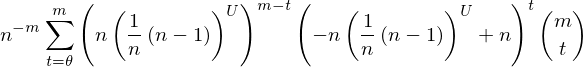

In [7]:
expectedUnionSize = U - (U + (n*(((n-1)/n) ** U)) - n)

numUnionMatches = Sum(binomial(m, t)*(E ** t)*((n-E) ** (m-t)), (t, theta, m))
numUnionMatches = numUnionMatches.subs(E, expectedUnionSize)
numUnionTotal = n ** m
unionProb = numUnionMatches / numUnionTotal
unionProb

In [5]:
# Debugging, ignore
print expectedUnionSize.subs(U, 60).subs(n, 20).evalf()

19.0786040202610


In [6]:
print collision.subs(m, 80).subs(n, 20).subs(theta, 20).evalf()
# Should be identical when U is 1
print unionProb.subs(m, 80).subs(n, 20).subs(theta, 20).subs(U, 1).evalf()

1.82479860292780e-9
1.82479860292780e-9


# Plot the False Match Probability for Unions

In [7]:
x = range(51)
unionPlots = [
    Scatter(x=x, y=[float(unionProb.subs(n, 20).subs(theta, threshold).subs(m, 80).subs(U, i).evalf()) for i in x], name="Threshold={}".format(threshold))
    for threshold in (20, 40, 60, 80)]

layout = Layout(
    title= 'Error Probability with Unions (80 modules, 20 cells per module)',
    xaxis= dict(
        title= '# of Representations in Union',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=unionPlots, layout=layout)

iplot(fig)

# Compute False Match with Unions and Subsampling

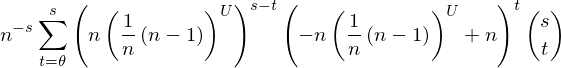

In [8]:
numSubsamplingMatches = binomial(m, s) * numUnionMatches.subs(m, s)
numSubsamplingTotal = binomial(m, s) * numUnionTotal.subs(m, s)
probSubsampling = numSubsamplingMatches / numSubsamplingTotal
probSubsampling

In [9]:
x = range(31)
subsamplingPlots = [
    Scatter(x=x, y=[float(probSubsampling.subs(n, 20).subs(theta, threshold).subs(m, 80).subs(U, i).subs(s, sampling).evalf()) for i in x], name="Threshold={}, Sampling={}".format(threshold, sampling))
    for sampling, threshold in ((20, 8), (20, 10), (20, 12), (20, 14))]

layout = Layout(
    title= 'Error Probability with Unions and Sampling (80 modules, 20 cells per module)',
    xaxis= dict(
        title= '# of Representations in Union',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=subsamplingPlots, layout=layout)

iplot(fig)

In [10]:
x = range(31)
subsamplingPlots = [
    Scatter(x=x, y=[float(probSubsampling.subs(n, 20).subs(theta, threshold).subs(m, 80).subs(U, i).subs(s, sampling).evalf()) for i in x], name="Threshold={}, Sampling={}".format(threshold, sampling))
    for sampling, threshold in ((20, 10), (30, 15), (40, 20), (50, 25))]

layout = Layout(
    title= 'Error Probability with Unions and Sampling (80 modules, 20 cells per module)',
    xaxis= dict(
        title= '# of Representations in Union',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=subsamplingPlots, layout=layout)

iplot(fig)

In [11]:
x = range(31)
subsamplingPlots = [
    Scatter(x=x, y=[float(probSubsampling.subs(n, 20).subs(theta, threshold).subs(m, 80).subs(U, i).subs(s, sampling).evalf()) for i in x], name="Threshold={}, Sampling={}".format(threshold, sampling))
    for sampling, threshold in ((20, 10), (30, 20), (40, 30), (50, 40))]

layout = Layout(
    title= 'Error Probability with Unions and Sampling (80 modules, 20 cells per module)',
    xaxis= dict(
        title= '# of Representations in Union',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=subsamplingPlots, layout=layout)

iplot(fig)

# False Match with Multiple Cells Subsampling

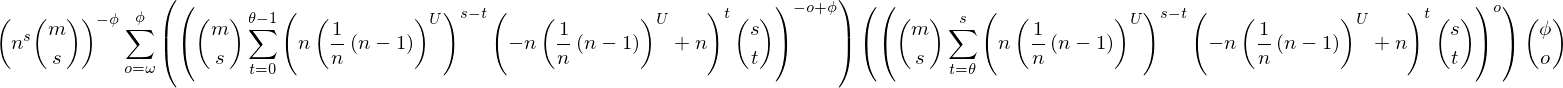

In [12]:
numUnionNotMatches = Sum(binomial(m, t)*(E ** t)*((n-E) ** (m-t)), (t, 0, theta-1))
numUnionNotMatches = numUnionNotMatches.subs(E, expectedUnionSize)

numSubsamplingNotMatches = binomial(m, s) * numUnionNotMatches.subs(m, s)

numSubsamplingMatchesMulti = Sum(binomial(phi, o) * (numSubsamplingMatches ** o) * (numSubsamplingNotMatches ** (phi - o)), (o, omega, phi))
numSubsamplingTotalMulti =  numSubsamplingTotal ** phi
probMatchMulti = numSubsamplingMatchesMulti / numSubsamplingTotalMulti
probMatchMulti

In [13]:
probSubsampling.subs(n, 20).subs(theta, 20).subs(m, 80).subs(s, 20).subs(U, 20).evalf()

In [14]:
# Make sure we get the same results as before when phi, omega are 1
probMatchMulti.subs(phi, 1).subs(omega, 1).subs(n, 20).subs(theta, 20).subs(m, 80).subs(s, 20).subs(U, 20).evalf()

In [15]:
# Debugging, ignore
unionRange = range(11)
[[probMatchMulti.subs(phi, 20).subs(omega, 10).subs(n, 20).subs(theta, 10).subs(m, 80).subs(s, sampling).subs(U, i).evalf() for i in unionRange] for sampling in (20,)]

In [16]:
x = range(21)
plots = [
    Scatter(x=x, y=[float(probMatchMulti.subs(phi, 20).subs(omega, 10).subs(n, 30).subs(theta, 20).subs(m, 80).subs(U, i).subs(s, 20).evalf()) for i in x], name="30 sampling cells, 20 must match"),
    Scatter(x=x, y=[float(probMatchMulti.subs(phi, 1).subs(omega, 1).subs(n, 30).subs(theta, 20).subs(m, 80).subs(U, i).subs(s, 20).evalf()) for i in x], name="1 sampling cell"),
]

layout = Layout(
    title= 'Error Probability with Multiple Subsampling Cells (80 modules, 20 cells per module)',
    xaxis= dict(
        title= '# of Representations in Union',
    ),
    yaxis=dict(
        title= 'Probability of False Match',
    ),
)
fig = Figure(data=plots, layout=layout)

iplot(fig)

# Validate with Simulations

Below are two sets of simulations that empirically compute the probabilities calculated above. Several values are used to show that the results match.

In [2]:
import numpy as np

In [18]:
def check(m, n, t):
    r1 = np.random.randint(n, size=m)
    r2 = np.random.randint(n, size=m)
    overlap = np.equal(r1, r2).nonzero()[0].size
    return overlap >= t


numTrials = 1000000

def estimateProb(m, n, t, U):
    collisions = 0
    for _ in xrange(numTrials):
        collisions += int(check(m, n, t))

    prob = float(collisions) / float(numTrials)
    #print "m={} n={} t={} U={} and prob is {}".format(m, n, t, U, prob)
    return prob

for numCells in (1, 2, 3, 4, 5, 6):
    simProb = estimateProb(20, numCells, 10, 1)
    calcProb = float(collision.subs(m, 20).subs(n, numCells).subs(theta, 10).evalf())
    print "With m={} n={} t={} U={}, calculated prob is:\n{}\nand simulated prob is:\n{}\n".format(20, numCells, 10, 1, calcProb, simProb)

With m=20 n=1 t=10 U=1, calculated prob is:
1.0
and simulated prob is:
1.0

With m=20 n=2 t=10 U=1, calculated prob is:
0.588098526001
and simulated prob is:
0.588963

With m=20 n=3 t=10 U=1, calculated prob is:
0.0918957744873
and simulated prob is:
0.092305

With m=20 n=4 t=10 U=1, calculated prob is:
0.0138644169438
and simulated prob is:
0.01392

With m=20 n=5 t=10 U=1, calculated prob is:
0.00259482740067
and simulated prob is:
0.002496

With m=20 n=6 t=10 U=1, calculated prob is:
0.000598503936604
and simulated prob is:
0.000589



In [8]:
def check(m, n, t, U):
    r1 = np.random.randint(n, size=(m, U))
    r2 = np.random.randint(n, size=(m, 1))
    overlap = 0
    for module in xrange(r1.shape[0]):
        match = np.intersect1d(r1[module], r2[module])
        if len(match) > 0:
            overlap += 1
    return overlap >= t


numTrials = 1000000

def estimateProb(m, n, t, U):
    collisions = 0
    for _ in xrange(numTrials):
        collisions += int(check(m, n, t, U))

    prob = float(collisions) / float(numTrials)
    #print "m={} n={} t={} U={} and prob is {}".format(m, n, t, U, prob)
    return prob

for unionSize in (1, 2, 3, 4, 5, 6):
    simProb = estimateProb(20, 10, 10, unionSize)
    calcProb = float(unionProb.subs(m, 20).subs(n, 10).subs(theta, 10).subs(U, unionSize).evalf())
    print "With m={} n={} t={} U={}, calculated prob is:\n{}\nand simulated prob is:\n{}\n".format(20, 10, 10, unionSize, calcProb, simProb)

With m=20 n=10 t=10 U=1, calculated prob is:
7.15090402108e-06
and simulated prob is:
8e-06

With m=20 n=10 t=10 U=2, calculated prob is:
0.00173091693285
and simulated prob is:
0.00175

With m=20 n=10 t=10 U=3, calculated prob is:
0.0244030388572
and simulated prob is:
0.024449

With m=20 n=10 t=10 U=4, calculated prob is:
0.110198023549
and simulated prob is:
0.110114

With m=20 n=10 t=10 U=5, calculated prob is:
0.273263643935
and simulated prob is:
0.273117

With m=20 n=10 t=10 U=6, calculated prob is:
0.475182009823
and simulated prob is:
0.475516

